<a href="https://colab.research.google.com/github/holabayor/Hamoye-Internship-Workbook/blob/main/Hamoye_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
energy_data = pd.read_csv('/content/drive/MyDrive/Hamoye/energydata_complete.csv', parse_dates = ['date'])
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Had to check these to understand what each column stands for

columns = {'T1' : 'Temperature in kitchen area, in Celsius',
'RH_1' : 'Humidity in kitchen area, in %' , 
'T2' : 'Temperature in living room area, in Celsius',
'RH_2' : 'Humidity in living room area, in %', 
'T3' : 'Temperature in laundry room area',
'RH_3' : 'Humidity in laundry room area, in %',
'T4' : 'Temperature in office room, in Celsius',
'RH_4' : 'Humidity in office room, in %',
'T5' : 'Temperature in bathroom, in Celsius',
'RH_5' : 'Humidity in bathroom, in %',
'T6' : 'Temperature outside the building (north side), in Celsius',
'RH_6' : 'Humidity outside the building (north side), in %',
'T7' : 'Temperature in ironing room , in Celsius',
'RH_7' : 'Humidity in ironing room, in %',
'T8' : 'Temperature in teenager room 2, in Celsius',
'RH_8' : 'Humidity in teenager room 2, in %',
'T9' : 'Temperature in parents room, in Celsius',
'RH_9' : 'Humidity in parents room, in %',
'To' : 'Temperature outside (from Chievres weather station), in Celsius',
'Pressure' : 'Pressure (from Chievres weather station), in mm Hg',
'RH_out' : 'Humidity outside (from Chievres weather station), in %',
'Wind speed' : 'Wind speed (from Chievres weather station), in m/s',
'Visibility' :'Visibility (from Chievres weather station), in km',
'Tdewpoint' : 'Tdewpoint (from Chievres weather station), Â°C',
'rv1' : 'Random variable 1, nondimensional',
'rv2' : 'Random variable 2, nondimensional'}

In [4]:
# energy_data = energy_data.rename(columns = columns)
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [5]:
# There are no nulls in the dataset
# Let's visualize the dataset for more insights.

In [6]:
# energy_data.corr()

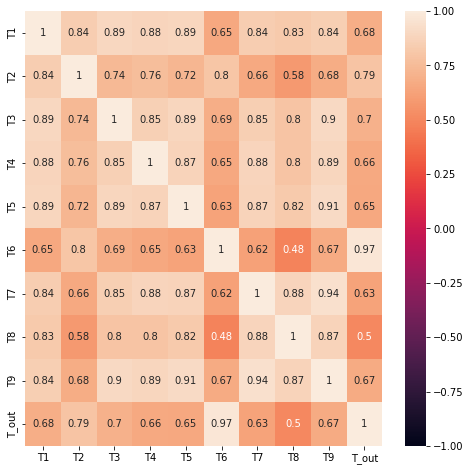

In [7]:
# Check the correlation between the Temperatire columns

plt.figure(figsize=(8, 8))
sns.heatmap(energy_data[['T1', 'T2', 'T3',	'T4',	'T5',	'T6',	'T7',	'T8',	'T9',	'T_out']].corr(), annot = True, vmin=-1, vmax=1)
plt.show()

There are high corrrelations between the temperature columns.

**To calculate $R^2$**




In [8]:
x_values = energy_data['T2']
y_values = energy_data['T6']

we will use numpy ```np.corrcoef()``` function

In [9]:
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(round(r_squared, 2))

0.64


**Normalise the data using MinMax Scaler and choose train features and targets**

In [10]:
#Firstly, drop the unwanted columns
features = energy_data.drop(columns=['date', 'lights'])

# Then, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_data = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
X = normalised_data.drop('Appliances', axis = 1)
y = normalised_data['Appliances']


In [11]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

#fit the model to the training dataset
linear.fit(X_train, y_train)

#Make predctions
y_preds = linear.predict(X_test)

In [13]:
y_preds

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [14]:
y_test.values

array([0.02803738, 0.07476636, 0.03738318, ..., 0.03738318, 0.09345794,
       0.03738318])

In [15]:
# Make a DataFrame for the features and their weights
linear_weights = pd.Series(linear.coef_, X_train.columns).reset_index()
linear_weights.columns = ['Feature', 'Weights']
#linear_weights[linear_weights['Weights'] != 0]
linear_weights.sort_values(by = 'Weights')

,Feature,Weights
3,RH_2,-0.456698
18,T_out,-0.321860
2,T2,-0.236178
16,T9,-0.189941
15,RH_8,-0.157595
20,RH_out,-0.077671
13,RH_7,-0.044614
17,RH_9,-0.039800
8,T5,-0.015657
0,T1,-0.003281


**Check model performances**

In [16]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)

print(f"The Mean Absolute Error of the Linear Regression model is {round(mae, 2)}")

The Mean Absolute Error of the Linear Regression model is 0.05


In [17]:
# Residual Sum of Sqaure
rss = np.sum(np.square(y_test - y_preds))

print(f"The Residual Sum of Squares of the Linear Regression model is {round(rss, 2)}")

The Residual Sum of Squares of the Linear Regression model is 45.35


In [18]:
# Root mean square 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_preds))

print(f"The Root Mean Square of the Linear Regression model is {round(rmse, 3)}")

The Root Mean Square of the Linear Regression model is 0.088


In [19]:
# The coefficient of Determination / R Squared
from sklearn.metrics import r2_score
cofd = r2_score(y_test, y_preds)

print(f"The coefficient of Determination of the Linear Regression model is {round(cofd, 2)}.")

The coefficient of Determination of the Linear Regression model is 0.15


**Compare model performance with other models**

*Ridge Regression*

In [20]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)

ridge_preds = ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
print(f"The Root Mean Square of the Ridge Regression model is {round(ridge_rmse, 3)}")

The Root Mean Square of the Ridge Regression model is 0.088


*Lasso Regresion*

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [22]:
lasso.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [23]:
# To find the total number of non-zero weights

sum(lasso.coef_ != 0)

4

In [24]:
lasso_preds = lasso.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
print(f"The Root Mean Square of the Lasso Regression model is {round(lasso_rmse, 3)}")

The Root Mean Square of the Lasso Regression model is 0.094


In [25]:
# Make a DataFrame for the features and their weights
lasso_weights = pd.Series(lasso.coef_, X_train.columns).reset_index()
lasso_weights.columns = ['Feature', 'Weights']
lasso_weights[lasso_weights['Weights'] != 0]

,Feature,Weights
1,RH_1,0.017880
15,RH_8,-0.000110
20,RH_out,-0.049557
21,Windspeed,0.002912
